1. If an image has insufficient contrast
2. Human casn distinguish 700-900 greyscales
3. evenly distribute the greyscales
4. normally equalise only the greyscales / luminance

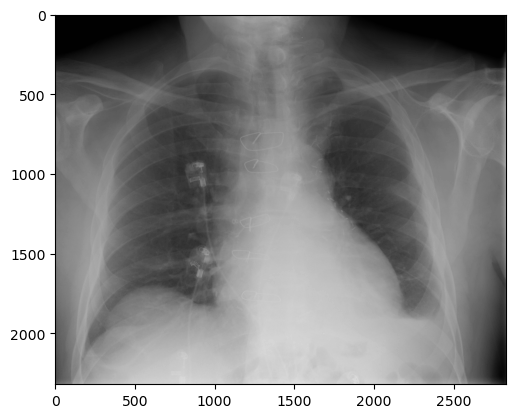

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('../../../assets/lung.jpg')
plt.imshow(img, cmap='gray')


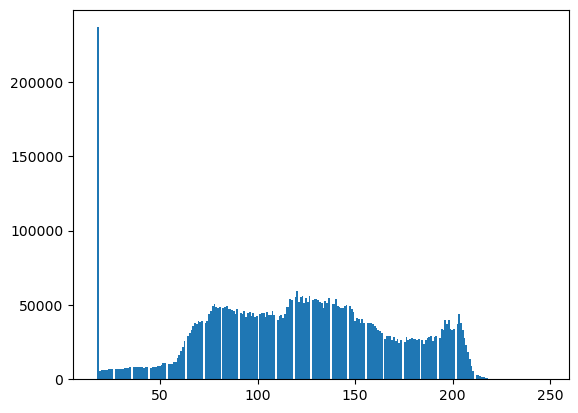

In [2]:
img = np.asarray(img)
flat = img.flatten()

plt.hist(flat, bins=256)
plt.show()

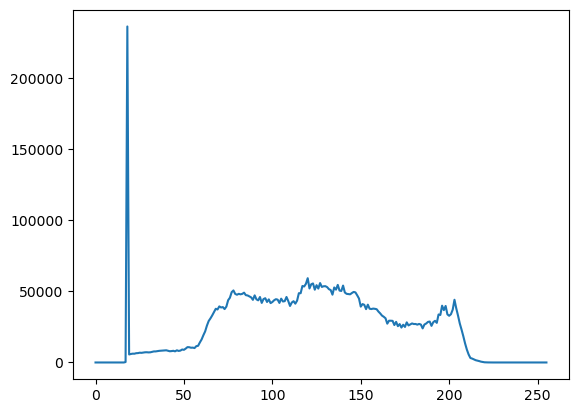

In [3]:
def get_hist(image, bins):
    hist = np.zeros(bins)

    for pixel in image:
        hist[pixel] += 1
    
    return hist

hist = get_hist(flat, 256)
plt.plot(hist)
plt.show()


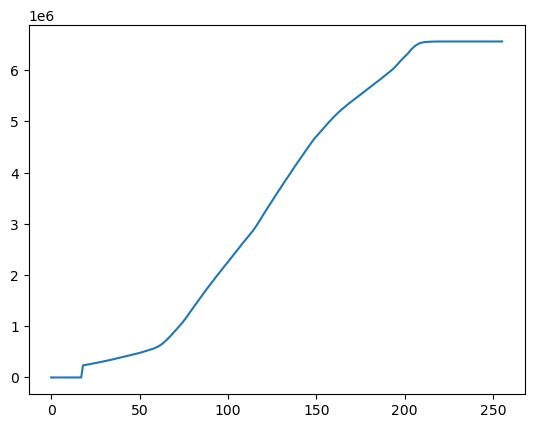

In [4]:
def cumsum(a):
    a = iter(a)
    b = [next(a)]

    for i in a:
        b.append(b[-1] + i)
    
    return np.array(b)

cs = cumsum(hist)

plt.plot(cs)
plt.show()


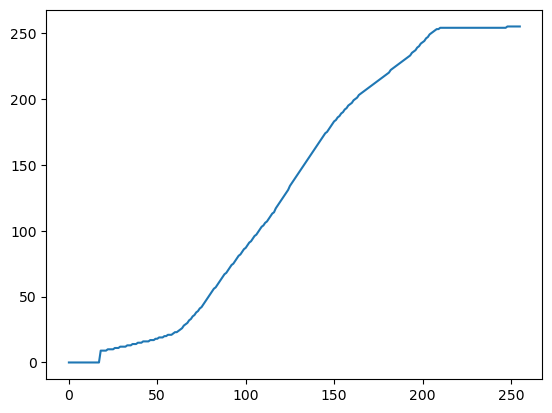

In [5]:
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

cs = nj / N

cs_normalized = cs.astype('uint8')

plt.plot(cs_normalized)
plt.show()


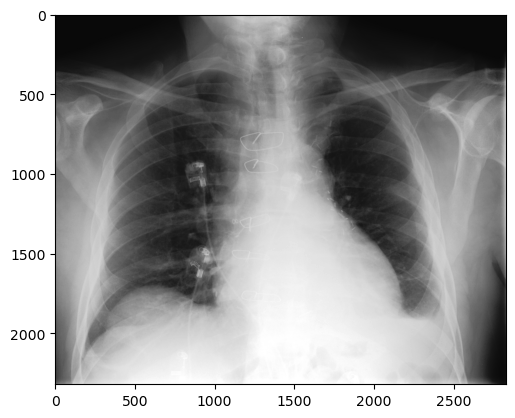

In [6]:
img_new = cs[flat]
img_new = np.reshape(img_new, img.shape)

plt.imshow(img_new, cmap='gray')
plt.show()


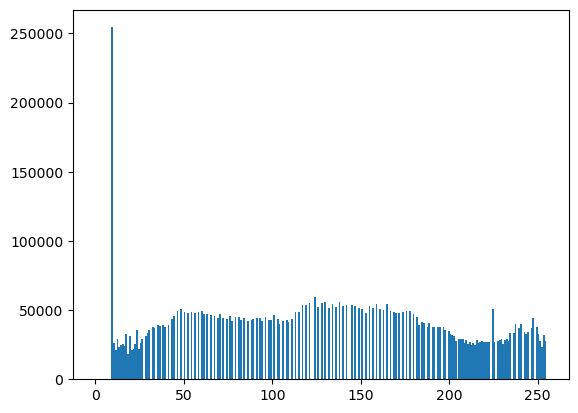

In [7]:
plt.hist(img_new.flatten(), bins=256)
plt.show()
